# https://huggingface.co/AskUI/pta-text-0.1

In [1]:
%pip install -q askui-ml-helper

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 2.2.1 which is incompatible.
torchvision 0.15.2+cu118 requires torch==2.0.1, but you have torch 2.2.1 which is incompatible.


In [24]:
%pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\TeamD\\.conda\\envs\\sfm\\Lib\\site-packages\\~orch\\lib\\asmjit.dll'
Consider using the `--user` option or check the permissions.



In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Feb__8_05:53:42_Coordinated_Universal_Time_2023
Cuda compilation tools, release 12.1, V12.1.66
Build cuda_12.1.r12.1/compiler.32415258_0


In [2]:
import torch
print(torch.__version__)
assert torch.cuda.is_available()

2.2.1+cu121


In [3]:
import requests
from PIL import Image
from askui_ml_helper.utils.pta_text import PtaTextInference

pta_text_inference = PtaTextInference(r"G:\ml\models\pta-text-v0 1\pta-text-v0.1.pt")

c:\Users\TeamD\.conda\envs\sfm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of Pix2StructVisionModel were not initialized from the model checkpoint at google/matcha-base and are newly initialized: ['embeddings.column_embedder.weight', 'embeddings.patch_projection.bias', 'embeddings.patch_projection.weight', 'embeddings.row_embedder.weight', 'encoder.layer.0.attention.key.weight', 'encoder.layer.0.attention.output.weight', 'encoder.layer.0.attention.query.weight', 'encoder.layer.0.attention.value.weight', 'encoder.layer.0.mlp.wi_0.weight', 'encoder.layer.0.mlp.wi_1.weight', 'encoder.layer.0.mlp.wo.weight', 'encoder.layer.0.pre_attention_layer_norm.weight', 'encoder.layer.0.pre_mlp_layer_norm.weight', 'encoder.layer.1.attention.key.weight', 'encoder.layer.1.attention.output.weight', 'encoder.layer.1.

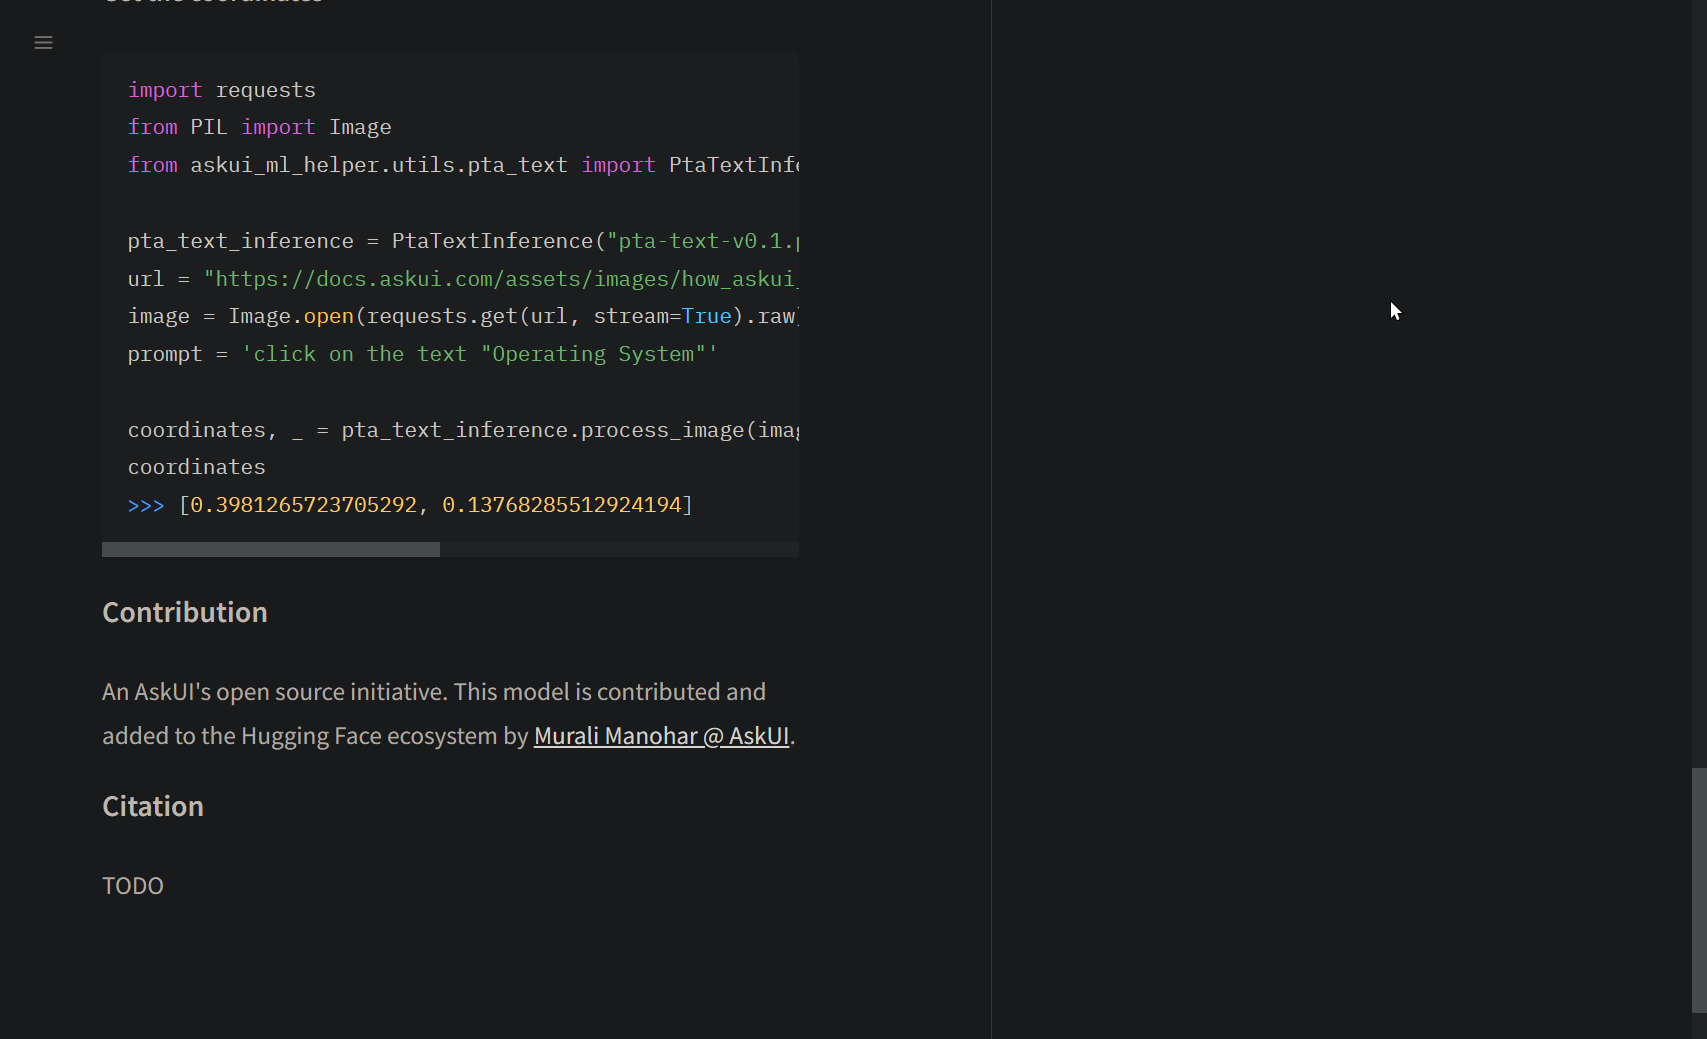

In [40]:
# url = "https://docs.askui.com/assets/images/how_askui_works_architecture-363bc8be35bd228e884c83d15acd19f7.png"
# image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
from IPython.display import display
path = r"C:\Users\TeamD\OneDrive\Pictures\Screenshots\ShareX Screenshots\2024-02\msedge_Bi24MNRDCG.png"
image = Image.open(path).convert("RGB")
display(image)

In [41]:
prompt = 'click on the text "prompt"'
coords = pta_text_inference.process_image(image, prompt)
print(coords)

[0.0817427858710289, 0.35349345207214355]


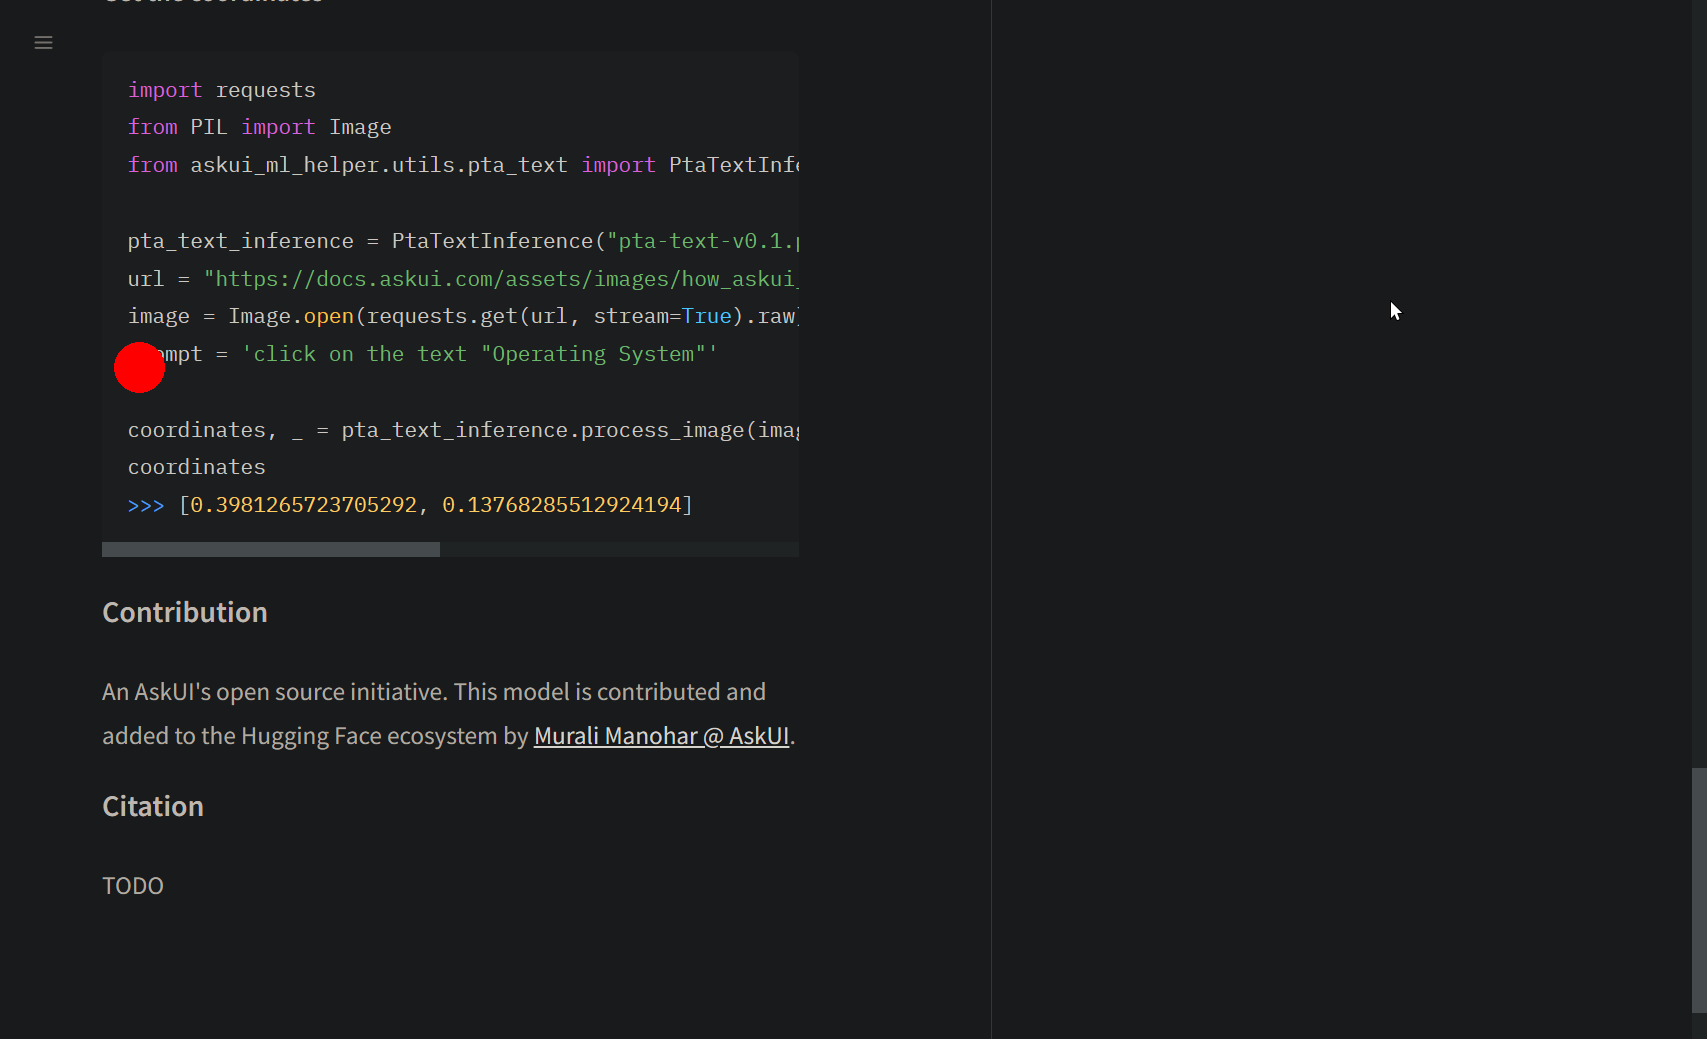

In [42]:
render_image = pta_text_inference.draw_circle_on_image(image.copy(), coords, radius=25)
display(render_image)